Spot of Poisson
=============

<font size="1.5">Fred van Goor, March 15, 2019</font>

___

In [1]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

The Arago- or Poisson spot appears at the center of a circular object's shadow due to Fresnel diffraction. This spot played an important role in the discovery of the wave nature of light and can be used to demonstrate that light behaves as a wave.

The discussion about the spot started in the beginning of the 19th century during a competition of the French Academy of Sciences. Poisson studied the Fresnel diffraction theory and found that this theory would predict a bright spot at the center in the shadow of a circular disk illuminated by light originated from a point source (which is a source with high spatial coherency). As a supporter of the particle theory of light he concluded that this prooved that the wave theory of light was wrong.

However Arago performed an experiment and observed the spot. From that moment light was considered to be a wave phenomena decribed by Fresnel's theory based on Maxwell's equations and the spot was called with a bit of irony as "Poisson's spot" but also as "Arago's spot".


<IPython.core.display.Javascript object>


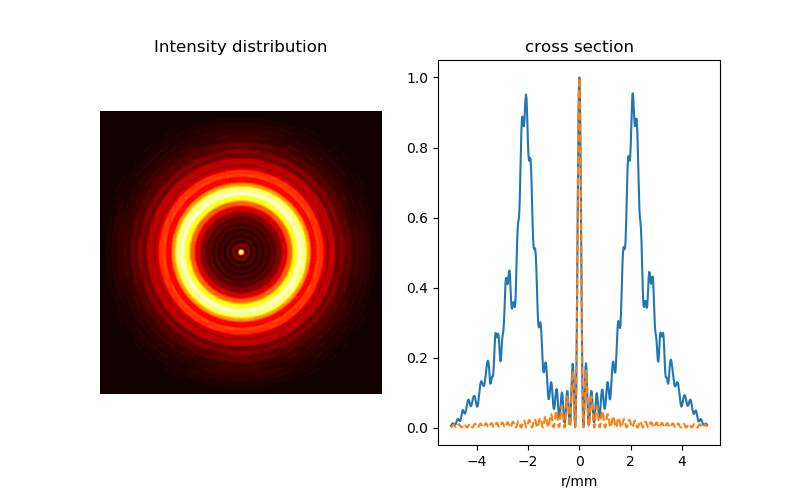

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='D [mm]', max=5.0, min=1.0, …

In [2]:
%matplotlib notebook
#!/usr/bin/env python
"""
    Posson's spot.
    ====================================================================
    
    ..  :copyright: (c) 2019 by Fred van Goor.
    :license: MIT, see License for more details.
    
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.special as sp
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,5))

from LightPipes import *

wavelength=632.8*nm
size=10*mm;
N=500;
r=np.zeros(N)
r=(np.arange(0,N)*size/N-size/2)/mm
ax = fig.add_subplot(121)

ax2=fig.add_subplot(122)

def PoissonSim(D,z):
    R=D/2*mm
    z=z*cm
    F=Begin(size,wavelength,N);
    F=GaussHermite(0,0,1,size/3,F)
    F=CircScreen(R,0,0,F);
    F=Fresnel(z,F);
    I=Intensity(1,F);
    ax.contourf(I,50,cmap='hot')

    ax.axis('off'); ax.axis('equal');
    str='Intensity distribution'
    ax.set_title(str)
    ax.format_coord = lambda x, y: 'x = %2.2f mm, y = %2.2f mm, Intensity = %2.4f a.u.' % ((-size/2 + x*size/N)/mm, (-size/2 + y*size/N)/mm, I[int(x)][int(y)])
    ax2.clear()
    ax2.set_title('cross section')
    ax2.set_xlabel('r/mm')
    ax2.plot(r,I[:][int(N/2)])
    b=math.pi*D/wavelength/z*1e-6
    ax2.plot(r,sp.jv(0,b*r)**2,'--')
    plt.show()

w=interact(PoissonSim,
           D=widgets.FloatSlider(description='D [mm]',min=1,max=5,step=1,value=3,continuous_update=False,readout_format='.2f'),
           z=widgets.FloatSlider(description='z [cm]',min=0.01,max=200.0,step=5,value=100.0,continuous_update=False,readout_format='.1f'),
          );


The simulation calculates the intensity distribution at a distance, $z$, from a disk with diameter, $D$. The disk is illuminated by a Gaussian beam from a HeNe laser ($\lambda=632.8nm$). The central lobe can be approximated by a squared zeroth Bessel function of the first kind:
$$
J_0^2\left(\frac{{\pi}Dr}{{\lambda}z}\right)
$$
This function is also plotted by the red line in the figure above .